# SVM Tuning

In [1]:
from sklearn.model_selection import train_test_split

from assignment_2.digits_classifiers.model import Dataset, ClassifierTuning
from assignment_2.digits_classifiers.classifiers import SVMLinearClassifier, SVMPolynomialClassifier, SVMRBFKernelsClassifier
from assignment_2.digits_classifiers.io import read_datasets

## Import dataset

In [2]:
data = read_datasets()

2022-12-14 14:51:55.098 | INFO     | assignment_2.digits_classifiers.io:read_datasets:40 - Reading datasets


In [3]:
X, y = data

## Removing constant columns

In [4]:
always_zero = [c for c in list(X.columns) if sum(X.loc[:, c]) == 0]

In [5]:
X.drop(columns=always_zero, axis=1, inplace=True)

## Discard part of data

In [6]:
X, _, y, _ = train_test_split(X, y, test_size=0.95)

## Train Test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

In [8]:
X_train

,pixel13,pixel14,pixel15,pixel16,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data = Dataset(x=X, y=y)
train = Dataset(x=X_train, y=y_train)
test = Dataset(x=X_test, y=y_test)

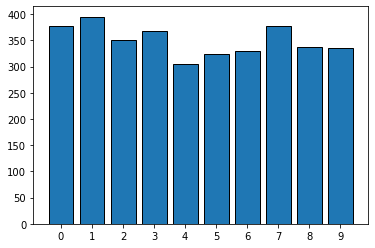

In [10]:
data.digit_distribution()

## Training SVM

### Linear SVM

In [11]:
linears = [
    SVMLinearClassifier(train=train, test=test, c=c)
    for c in [1, 2, 5, 10]
]

In [12]:
tuning_linears = ClassifierTuning(classifiers=linears, data=train, k=5)

In [13]:
tuning_linears.evaluate_best_model()

2022-12-14 14:52:02.862 | INFO     | assignment_2.digits_classifiers.model:evaluate_best_model:298 - Evaluating classifier: [LinearSVM: Train 2800, Test 700] - [C: 1]
2022-12-14 14:52:02.909 | INFO     | assignment_2.digits_classifiers.model:evaluate:244 -  > Processing fold 1
2022-12-14 14:52:03.315 | INFO     | assignment_2.digits_classifiers.model:evaluate:244 -  > Processing fold 2
2022-12-14 14:52:03.674 | INFO     | assignment_2.digits_classifiers.model:evaluate:244 -  > Processing fold 3
2022-12-14 14:52:04.034 | INFO     | assignment_2.digits_classifiers.model:evaluate:244 -  > Processing fold 4
2022-12-14 14:52:04.378 | INFO     | assignment_2.digits_classifiers.model:evaluate:244 -  > Processing fold 5
2022-12-14 14:52:04.721 | INFO     | assignment_2.digits_classifiers.model:evaluate_best_model:298 - Evaluating classifier: [LinearSVM: Train 2800, Test 700] - [C: 2]
2022-12-14 14:52:04.768 | INFO     | assignment_2.digits_classifiers.model:evaluate:244 -  > Processing fold 1


In [14]:
tuning_linears.best_model

[LinearSVM: Train 2240, Test 560] - [C: 1]

In [15]:
best_linear = tuning_linears.best_model
best_linear.change_dataset(
    train=train,
    test=test
)
best_linear.train()
best_linear.predict()
best_linear.accuracy

0.9114285714285715

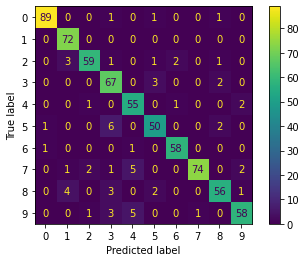

In [16]:
best_linear.confusion_matrix()

### Polinomial SVM

In [17]:
polys = [
    SVMPolynomialClassifier(train=train, test=test, c=c, degree=2)
    for c in [1, 2, 5, 10]
]

In [18]:
tuning_polys = ClassifierTuning(classifiers=polys, data=train, k=5)

In [19]:
tuning_polys.evaluate_best_model()

2022-12-14 14:52:11.651 | INFO     | assignment_2.digits_classifiers.model:evaluate_best_model:298 - Evaluating classifier: [PolynomialSVM: Train 2800, Test 700] - [C: 1, Degree: 2]
2022-12-14 14:52:11.698 | INFO     | assignment_2.digits_classifiers.model:evaluate:244 -  > Processing fold 1
2022-12-14 14:52:12.261 | INFO     | assignment_2.digits_classifiers.model:evaluate:244 -  > Processing fold 2
2022-12-14 14:52:12.917 | INFO     | assignment_2.digits_classifiers.model:evaluate:244 -  > Processing fold 3
2022-12-14 14:52:13.620 | INFO     | assignment_2.digits_classifiers.model:evaluate:244 -  > Processing fold 4
2022-12-14 14:52:14.370 | INFO     | assignment_2.digits_classifiers.model:evaluate:244 -  > Processing fold 5
2022-12-14 14:52:15.120 | INFO     | assignment_2.digits_classifiers.model:evaluate_best_model:298 - Evaluating classifier: [PolynomialSVM: Train 2800, Test 700] - [C: 2, Degree: 2]
2022-12-14 14:52:15.167 | INFO     | assignment_2.digits_classifiers.model:evalua

In [20]:
best_polys = tuning_polys.best_model
best_polys.change_dataset(
    train=train,
    test=test
)
best_polys.train()
best_polys.predict()
best_polys.accuracy

0.9542857142857143

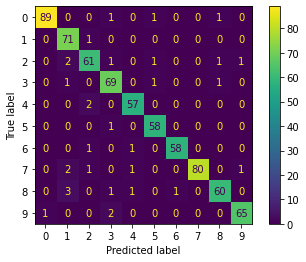

In [21]:
best_polys.confusion_matrix()

### RBF Kernel Classifier

In [22]:
rbfs = [
    SVMRBFKernelsClassifier(train=train, test=test, c=c)
    for c in [1, 2, 5, 10]
]

In [23]:
tuning_rbfs = ClassifierTuning(classifiers=rbfs, data=train, k=5)

In [24]:
tuning_rbfs.evaluate_best_model()

2022-12-14 14:52:24.176 | INFO     | assignment_2.digits_classifiers.model:evaluate_best_model:298 - Evaluating classifier: [RBFKernelsSVM: Train 2800, Test 700] - [C: 1]
2022-12-14 14:52:24.207 | INFO     | assignment_2.digits_classifiers.model:evaluate:244 -  > Processing fold 1
2022-12-14 14:52:25.113 | INFO     | assignment_2.digits_classifiers.model:evaluate:244 -  > Processing fold 2
2022-12-14 14:52:26.004 | INFO     | assignment_2.digits_classifiers.model:evaluate:244 -  > Processing fold 3
2022-12-14 14:52:27.010 | INFO     | assignment_2.digits_classifiers.model:evaluate:244 -  > Processing fold 4
2022-12-14 14:52:28.119 | INFO     | assignment_2.digits_classifiers.model:evaluate:244 -  > Processing fold 5
2022-12-14 14:52:29.139 | INFO     | assignment_2.digits_classifiers.model:evaluate_best_model:298 - Evaluating classifier: [RBFKernelsSVM: Train 2800, Test 700] - [C: 2]
2022-12-14 14:52:29.201 | INFO     | assignment_2.digits_classifiers.model:evaluate:244 -  > Processing

In [25]:
best_rbfs = tuning_rbfs.best_model
best_rbfs.change_dataset(
    train=train,
    test=test
)
best_rbfs.train()
best_rbfs.predict()
best_rbfs.accuracy

0.9685714285714285

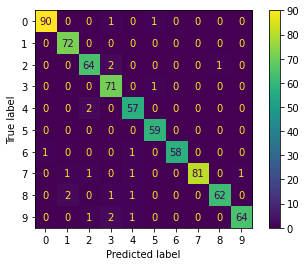

In [26]:
best_rbfs.confusion_matrix()